In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import axes
import pickle
from dateutil import parser
from datetime import date as dt
from datetime import timedelta
from scipy import log,exp,sqrt,stats
from copy import deepcopy
import itertools
print('Packages')

Packages


In [2]:
def max_drawdown(series):
    i = np.argmax(np.maximum.accumulate(series) - series) # end of the period
    j = np.argmax(series[:i]) # start of period
    dd = series[j] - series[i]
    dd_perc = ((series[j] - series[i])/series[j])*100
    
    return dd_perc, j, i

In [3]:
# Importing pickle file/files
df_2 = pd.read_pickle("Dec10.pkl").T
df_1 = pd.read_pickle("latest2019.pkl").T
df_3 = pd.read_pickle('Jan2019.pkl').T
df_1.index = pd.to_datetime(df_1.index)
df_2.index = pd.to_datetime(df_2.index)
df_3.index = pd.to_datetime(df_3.index)


df_4 = pd.concat([df_2, df_1], axis = 0, join = 'outer', sort = True)

df_5 = pd.concat([df_3, df_4], axis = 0, join = 'outer', sort = True)

df_5 = df_5.sort_index()

data = df_5[~df_5.index.duplicated(keep='first')].T


empty_asset = {'open_price': 0.0, 
               'high_price': 0.0, 
               'low_price': 0.0, 
               'close_price': 0.0, 
               'volume': 0.0, 
               'market_cap': 0.0}

# Filling Nan values with default 0-dictionaries
# This allows for correct operation as coins with an MC of 0 will never be selected and also don't contribute
# towards the TMC for any other purpose
for coin_name in data.index:
    for date in data.columns:
        if pd.isnull(data[date][coin_name]):
            data.at[coin_name, date] = empty_asset.copy()

In [4]:
data.columns = data.columns.strftime("%b %d, %Y")
print(data)

                                                            Dec 01, 2016  \
0chain                 {'open_price': 0.0, 'high_price': 0.0, 'low_pr...   
0x                     {'open_price': 0.0, 'high_price': 0.0, 'low_pr...   
0xbtc                  {'open_price': 0.0, 'high_price': 0.0, 'low_pr...   
0xcert                 {'open_price': 0.0, 'high_price': 0.0, 'low_pr...   
10mtoken               {'open_price': 0.0, 'high_price': 0.0, 'low_pr...   
1337coin               {'open_price': 3e-06, 'high_price': 8e-06, 'lo...   
1credit                {'open_price': 2.06, 'high_price': 2.29, 'low_...   
1world                 {'open_price': 0.0, 'high_price': 0.0, 'low_pr...   
23-skidoo              {'open_price': 2386.21, 'high_price': 2426.48,...   
2give                  {'open_price': 0.00041, 'high_price': 0.000463...   
300-token              {'open_price': 0.0, 'high_price': 0.0, 'low_pr...   
42-coin                {'open_price': 33.97, 'high_price': 198.95, 'l...   
4new        

In [5]:
for entry in data.columns:
    print(entry)

Dec 01, 2016
Dec 02, 2016
Dec 03, 2016
Dec 04, 2016
Dec 05, 2016
Dec 06, 2016
Dec 07, 2016
Dec 08, 2016
Dec 09, 2016
Dec 10, 2016
Dec 11, 2016
Dec 12, 2016
Dec 13, 2016
Dec 14, 2016
Dec 15, 2016
Dec 16, 2016
Dec 17, 2016
Dec 18, 2016
Dec 19, 2016
Dec 20, 2016
Dec 21, 2016
Dec 22, 2016
Dec 23, 2016
Dec 24, 2016
Dec 25, 2016
Dec 26, 2016
Dec 27, 2016
Dec 28, 2016
Dec 29, 2016
Dec 30, 2016
Dec 31, 2016
Jan 01, 2017
Jan 02, 2017
Jan 03, 2017
Jan 04, 2017
Jan 05, 2017
Jan 06, 2017
Jan 07, 2017
Jan 08, 2017
Jan 09, 2017
Jan 10, 2017
Jan 11, 2017
Jan 12, 2017
Jan 13, 2017
Jan 14, 2017
Jan 15, 2017
Jan 16, 2017
Jan 17, 2017
Jan 18, 2017
Jan 19, 2017
Jan 20, 2017
Jan 21, 2017
Jan 22, 2017
Jan 23, 2017
Jan 24, 2017
Jan 25, 2017
Jan 26, 2017
Jan 27, 2017
Jan 28, 2017
Jan 29, 2017
Jan 30, 2017
Jan 31, 2017
Feb 01, 2017
Feb 02, 2017
Feb 03, 2017
Feb 04, 2017
Feb 05, 2017
Feb 06, 2017
Feb 07, 2017
Feb 08, 2017
Feb 09, 2017
Feb 10, 2017
Feb 11, 2017
Feb 12, 2017
Feb 13, 2017
Feb 14, 2017
Feb 15, 2017

In [6]:
# Saving original date index
date_index = data.columns

print('Loading of Data')
print('shape of data: ', data.shape)

stable_coins = ["tether", "usd-coin", "trueusd"]

for coin in stable_coins:
    data.drop(coin, inplace=True)

Loading of Data
shape of data:  (2883, 794)


In [7]:
print('Getting Market Caps')
# Initialize a close_price list
mc_list = list()
# Making a list of all close_prices
for date in data.index:
    for column in data.columns:
        mc_list.append(data[column][date]['market_cap'])
        
# print(mc_list)

Getting Market Caps


In [8]:
print('Making Market Cap dataframe')
# Splitting list into 133 lists (one per coin)
mc_list = [mc_list[i:i + data.shape[1]] for i  in range(0, len(mc_list), data.shape[1])]   
# Making dataframe
mc_data = pd.DataFrame(data = mc_list, index = data.index, columns = data.columns)
print(mc_data)

Making Market Cap dataframe
                       Dec 01, 2016  Dec 02, 2016  Dec 03, 2016  Dec 04, 2016  \
0chain                          0.0           0.0           0.0           0.0   
0x                              0.0           0.0           0.0           0.0   
0xbtc                           0.0           0.0           0.0           0.0   
0xcert                          0.0           0.0           0.0           0.0   
10mtoken                        0.0           0.0           0.0           0.0   
1337coin                    38419.0       41054.0       34873.0       34713.0   
1credit                    104837.0      136832.0      166595.0      145380.0   
1world                          0.0           0.0           0.0           0.0   
23-skidoo                       NaN           NaN           NaN           NaN   
2give                      233885.0      212216.0      183051.0      186469.0   
300-token                       0.0           0.0           0.0           0.0   


In [9]:
print(mc_data.columns)

Index(['Dec 01, 2016', 'Dec 02, 2016', 'Dec 03, 2016', 'Dec 04, 2016',
       'Dec 05, 2016', 'Dec 06, 2016', 'Dec 07, 2016', 'Dec 08, 2016',
       'Dec 09, 2016', 'Dec 10, 2016',
       ...
       'Jan 24, 2019', 'Jan 25, 2019', 'Jan 26, 2019', 'Jan 27, 2019',
       'Jan 28, 2019', 'Jan 29, 2019', 'Jan 30, 2019', 'Jan 31, 2019',
       'Feb 01, 2019', 'Feb 02, 2019'],
      dtype='object', length=794)


In [10]:
print('Getting Close Prices')
# Initialize a close|_price list
cp_list = list()
# Making a list of all close_prices
for date in data.index:
    for column in data.columns:
        cp_list.append(data[column][date]['close_price'])

Getting Close Prices


In [11]:
print('Making Close Price dataframe')
# Splitting list into 133 lists (one per coin)
cp_list = [cp_list[i:i + data.shape[1]] for i  in range(0, len(cp_list), data.shape[1])]   
# Making dataframe
close_data = pd.DataFrame(data = cp_list, index = data.index, columns = data.columns)

print(close_data)

Making Close Price dataframe
                       Dec 01, 2016  Dec 02, 2016  Dec 03, 2016  Dec 04, 2016  \
0chain                     0.000000      0.000000      0.000000      0.000000   
0x                         0.000000      0.000000      0.000000      0.000000   
0xbtc                      0.000000      0.000000      0.000000      0.000000   
0xcert                     0.000000      0.000000      0.000000      0.000000   
10mtoken                   0.000000      0.000000      0.000000      0.000000   
1337coin                   0.000003      0.000003      0.000002      0.000002   
1credit                    1.550000      2.010000      2.440000      2.130000   
1world                     0.000000      0.000000      0.000000      0.000000   
23-skidoo               2420.890000   2488.670000   2467.560000   2464.510000   
2give                      0.000463      0.000420      0.000362      0.000369   
300-token                  0.000000      0.000000      0.000000      0.000000   

In [12]:
print('flipping the dates in order')
# Reording the date index
# close_data = close_data[close_data.columns[::-1]]
# mc_data = mc_data[mc_data.columns[::-1]]
# data = data[data.columns[::-1]]

print(close_data)

flipping the dates in order
                       Dec 01, 2016  Dec 02, 2016  Dec 03, 2016  Dec 04, 2016  \
0chain                     0.000000      0.000000      0.000000      0.000000   
0x                         0.000000      0.000000      0.000000      0.000000   
0xbtc                      0.000000      0.000000      0.000000      0.000000   
0xcert                     0.000000      0.000000      0.000000      0.000000   
10mtoken                   0.000000      0.000000      0.000000      0.000000   
1337coin                   0.000003      0.000003      0.000002      0.000002   
1credit                    1.550000      2.010000      2.440000      2.130000   
1world                     0.000000      0.000000      0.000000      0.000000   
23-skidoo               2420.890000   2488.670000   2467.560000   2464.510000   
2give                      0.000463      0.000420      0.000362      0.000369   
300-token                  0.000000      0.000000      0.000000      0.000000   


In [13]:
print('Share cap functions')

def share_cap_recurse(market_cap_list, num_coins, cap_ceiling_amount, final_cap_list):
    not_realloc_val = 0
    realloc_val = 0
    num_final = 0
    new_market_cap_list = []

    for i in range(0, len(market_cap_list)):
        if(market_cap_list[i] > cap_ceiling_amount):
            final_cap_list.append(cap_ceiling_amount)
            realloc_val += market_cap_list[i] - cap_ceiling_amount
            num_final += 1

        else:
            not_realloc_val += market_cap_list[i]

    if(num_final!=0):
        new_market_cap_list = [x * (1+(realloc_val/not_realloc_val)) for x in market_cap_list[num_final:]]
    else:
        new_market_cap_list = deepcopy(market_cap_list)

    
    if len(final_cap_list) == num_coins:
        return
    elif (new_market_cap_list[0] <= cap_ceiling_amount): #assumes ordered desc in market cap
        for cap in new_market_cap_list:
            final_cap_list.append(cap)
        return       

    else:
        share_cap_recurse(new_market_cap_list, num_coins, cap_ceiling_amount, final_cap_list)

def share_cap(market_cap_list, cap_ceiling_percent):  #CHANGE CAP CEILING HERE
    total_cap = sum(market_cap_list)
    cap_ceiling_amount = total_cap * cap_ceiling_percent
    final_cap_list = []
    share_cap_recurse(market_cap_list, len(market_cap_list), cap_ceiling_amount, final_cap_list)

    return (final_cap_list)

Share cap functions


In [14]:
# minimum_rebalance_interval = 7
# windows = []
# num_windows = 60
# window_length = 12*28
# window_stride = 4
# startDate = dt(2017, 1, 1) #- enddate 14th aug 2017 with 105 175 windows or 6 jan with 50
# endDate = startDate + timedelta(days=((num_windows-1)*window_stride))
# + timedelta(days=window_length)

# if(window_length % minimum_rebalance_interval != 0):
#     print("Warning: window length is not divisible by the rebalancing interval")
    
# for i in range(num_windows):  
#         windows.append(([i*window_stride
#                         + x for x in range(0, window_length+1)][0],
#                        [i*window_stride
#                         + x for x in range(0, window_length+1)][-1]))
# str_windows = []

# for pair in windows:
#     new_pair_1 = (startDate + timedelta(pair[0])).strftime("%b %d, %Y")
#     new_pair_2 = (startDate + timedelta(pair[1])).strftime("%b %d, %Y")
#     str_windows.append((new_pair_1, new_pair_2))

# print(window_length)
# print(len(str_windows))
# print(str_windows)

In [15]:
# final_dict_list = 
# tether_cap_values = [0.25, 0.50, 0.60, 0.70, 0.80, 0.90, 1]
# asset_cap_values = [0.10, 0.15, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1]
# mc_gearing_values = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

tether_cap_values = [0.50, 1]
asset_cap_values = [0.15, 0.20]
mc_gearing_values_up = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
mc_gearing_values_down = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# tether_cap_list = [("tcap", x) for x in tether_cap_values]
# asset_cap_list = [("acap", x) for x in asset_cap_values]
# mc_gearing_list = [("mcg", x) for x in mc_gearing_values]

tether_cap_list = [("tcap", x) for x in tether_cap_values]
asset_cap_list = [("acap", x) for x in asset_cap_values]
mc_gearing_list_up = [("mcgu", x) for x in mc_gearing_values_up]
mc_gearing_list_down = [("mcgd", x) for x in mc_gearing_values_down]

# spec_lists = [tether_cap_list, asset_cap_list, mc_gearing_list]
spec_lists = [tether_cap_list, asset_cap_list, mc_gearing_list_down, mc_gearing_list_up]
 
final_dict_list = list(itertools.product(*spec_lists))

print(len(final_dict_list))
print(final_dict_list)

# final_dict_list = [(('tcap', 0), ('acap', 0.15), ('mcg', 3)),
#                    (('tcap', 0.25), ('acap', 0.15), ('mcg', 3)),
#                    (('tcap', 0.50), ('acap', 0.15), ('mcg', 3)), 
#                    (('tcap', 0.75), ('acap', 0.15), ('mcg', 3)), 
#                    (('tcap', 1), ('acap', 0.15), ('mcg', 3)),
#                   (('tcap', 1), ('acap', 0.15), ('mcg', 0.5)),
#                   (('tcap', 1), ('acap', 0.15), ('mcg', 0))]

#0aggressive, 1balanced, 2conservative, 3benchmark
# final_dict_list = [(('tcap', 0.5), ('acap', 0.15), ('mcg', 0.5)),
#                    (('tcap', 1), ('acap', 0.15), ('mcgd', 1.5), ('mcgu', 1)), 
#                    (('tcap', 1), ('acap', 0.2), ('mcgd', 2), ('mcgu', 1)),
#                   (('tcap', 0), ('acap', 1), ('mcgd', 0), ('mcgu', 0))]

final_dict_list = [(('tcap', 1), ('acap', 0.15), ('mcgd', 1.5), ('mcgu', 1), ('numa', 10)),
                  (('tcap', 0), ('acap', 0.1), ('mcgd', 0), ('mcgu', 0), ('numa', 20))]

400
[(('tcap', 0.5), ('acap', 0.15), ('mcgd', 0.5), ('mcgu', 0.5)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 0.5), ('mcgu', 1)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 0.5), ('mcgu', 1.5)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 0.5), ('mcgu', 2)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 0.5), ('mcgu', 2.5)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 0.5), ('mcgu', 3)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 0.5), ('mcgu', 3.5)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 0.5), ('mcgu', 4)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 0.5), ('mcgu', 4.5)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 0.5), ('mcgu', 5)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 1), ('mcgu', 0.5)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 1), ('mcgu', 1)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 1), ('mcgu', 1.5)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 1), ('mcgu', 2)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 1), ('mcgu', 2.5)), (('tcap', 0.5), ('acap', 0.15), ('mcgd', 1), ('mcgu', 3)), (('tcap', 0.5),

In [16]:
yearly_tether_interest_rate = 0.025
daily_tether_interest_rate = (np.power((1 + yearly_tether_interest_rate), 1./365)) - 1

start_date = 'Dec 31, 2016'
end_date = 'Feb 02, 2019'

print(daily_tether_interest_rate)

6.765328177826824e-05


In [17]:
def toTitle(graph):
    title = ""
    for param in graph:
        title += param[0] + ":" + str(param[1]) + "_"
    return title[0:-1]

In [18]:
#////////////////////////////////////////////////////////////////////////////////////////////
# Selecting dates and median market caps
selectedmarket = mc_data.copy()
selectedmarketfull = (selectedmarket.loc[:, start_date:end_date]).copy()
selectedmarket = selectedmarket.loc[:, start_date:end_date:7]
# selectedmarket = selectedmarket.resample('W',axis=1).median()
# print(selectedmarketfull)

# Selecting dates and median close price
selectedclose = close_data.copy()
selectedclosefull = selectedclose.loc[:, start_date:end_date]
selectedclose = selectedclose.loc[:, start_date:end_date:7]
# selectedclose = selectedclose.resample('W',axis=1).median()

bitcoin = pd.DataFrame(data=selectedclosefull.T["bitcoin"], columns = ["bitcoin"])

pct_bitcoin = bitcoin.pct_change(1)
pct_bitcoin["bitcoin"] = (1 + pct_bitcoin["bitcoin"]).cumprod()

# pct_bitcoin["bitcoin"].iloc[0] = 1
pct_bitcoin.at[start_date, "bitcoin"] = 1
# print(pct_bitcoin)

# Daily close prices
dailyclose = close_data.loc[:,start_date:end_date]
dailyclose1 = dailyclose.copy().T
dailychanget = dailyclose1.pct_change(1).T
dailychange = dailyclose1.pct_change(1).T

# Calculating percent change for returns
selectedclose1 = selectedclose.copy().T
selectedreturns = selectedclose1.pct_change(1) .T
selectedreturns.head()
#     print('selected market, selectedclose, dailychange and selectedreturns')

#     print('Total market cap movement for tethershare')
tmc_list = list()

#weekly
#.copy().sort_values(ascending=False)[:200]
for column in selectedmarket.columns:
    tmc_list.append(selectedmarket[column].sum())
# print(selectedmarket[selectedmarket.columns[1][:20]])

tmc_data = pd.DataFrame(data = tmc_list, columns = ['total_mc'])
tmc_data.index = selectedmarket.columns
tmc_pct = tmc_data.pct_change(1)

tmc_list_full = []
#full set
for column in selectedmarketfull.columns:
    tmc_list_full.append(selectedmarketfull[column].copy().sum())
#     print(selectedmarketfull[column].copy().sort_values(ascending=False)[:2])

tmc_data_full = pd.DataFrame(data = tmc_list_full, columns = ['TMC'])
tmc_data_full.index = selectedmarketfull.columns
tmc_pct_full = tmc_data_full.pct_change(1)

# print(tmc_data_full)

tmc_pct_full["TMC"] = (1 + tmc_pct_full["TMC"]).cumprod()
tmc_pct_full.at[start_date, "TMC"] = 1

# for entry in tmc_pct_full["TMC"]:
#     print(entry)

# Resampling the tmc data to get weekly
#     print(tmc_pct)
tmc_pct = tmc_pct.loc[start_date:end_date,:]

# tmc_pct = tmc_pct.resample('W').median()
tmc_pct_index = tmc_pct.index

# print(tmc_pct)

print(len(tmc_pct_index), "full weeks in period")

num_index = np.arange(len(tmc_pct_index))
tmc_pct.index = num_index

110 full weeks in period


In [19]:
def sortino(series, column):
    fullMean = series.mean()[column]
    queryStr = "{} < {}".format(column, str(fullMean))
    #@ refers to a variable in the environment
    downside_series = series.query(queryStr)
#     print("mean",mean, "ds",downside_series)
    sortino = fullMean/downside_series.std()
    print("monthly downside deviation:", downside_series.std())
    
    return sortino

In [20]:
def information_ratio(returns, benchmark):
    diff = returns - benchmark
    return diff.mean() / diff.std()

In [21]:
def calculate_expenses(prev_coin_dict, new_coin_dict):
    prev_coin_dict = prev_coin_dict.to_dict()['pct_share']
    new_coin_dict = new_coin_dict.to_dict()['pct_share']
    delta = 0
    common_coins_keys = list(set(prev_coin_dict.keys()) & set(new_coin_dict.keys()))
    new_coins_keys = list(set(new_coin_dict.keys()) - set(prev_coin_dict.keys()))
    
    print(new_coin_dict)
    
#     print(common_coins_keys)
#     print(new_coins_keys)
    
    diff_list = []
    for key in common_coins_keys:
        diff_list.append(new_coin_dict[key] - prev_coin_dict[key])
    
    diff = sum(diff_list)
    
    new_asset_allocation = 0
    for key in new_coins_keys:
        new_asset_allocation += new_coin_dict[key]
            
    if prev_coin_dict.keys() == new_coin_dict.keys():
        delta = 0.5 * sum(map(abs, diff_list))
    
    elif diff < 0:
        delta = new_asset_allocation
            
    elif diff >= 0:
        delta = diff + new_asset_allocation
        
    return delta

In [22]:
writer = pd.ExcelWriter('Fund_data_updated.xlsx')
final_series_list = []

In [23]:
#calculating tmc movements for graphing purposes

0
Calculating: tcap:1_acap:0.15_mcgd:1.5_mcgu:1_numa:10
***************************************************************
770
vol               c10t_cum
2016-12-31         NaN
2017-12-31  435.503282
2018-12-31  225.693302
2019-12-31   24.655068
              c10t_cum
2016-12-31    6.557513
2017-01-31   15.176877
2017-02-28  112.884135
2017-03-31  103.908386
2017-04-30  179.952626
2017-05-31   21.857734
2017-06-30  -13.505667
2017-07-31   91.762135
2017-08-31  -21.281893
2017-09-30    3.157082
2017-10-31   84.525730
2017-11-30  158.133231
2017-12-31  -12.933482
2018-01-31  -10.293499
2018-02-28   -3.756528
2018-03-31   13.490471
2018-04-30  -12.070856
2018-05-31   -2.421994
2018-06-30   -1.065745
2018-07-31   -0.358052
2018-08-31   -0.021842
2018-09-30   -1.946381
2018-10-31   -0.670767
2018-11-30   -2.173694
2018-12-31   -1.624479
2019-01-31         NaN
2019-02-28         NaN
monthly std c10t_cum    57.196313
dtype: float64
sharpe c10t_cum    0.494634
dtype: float64
monthly downside devi

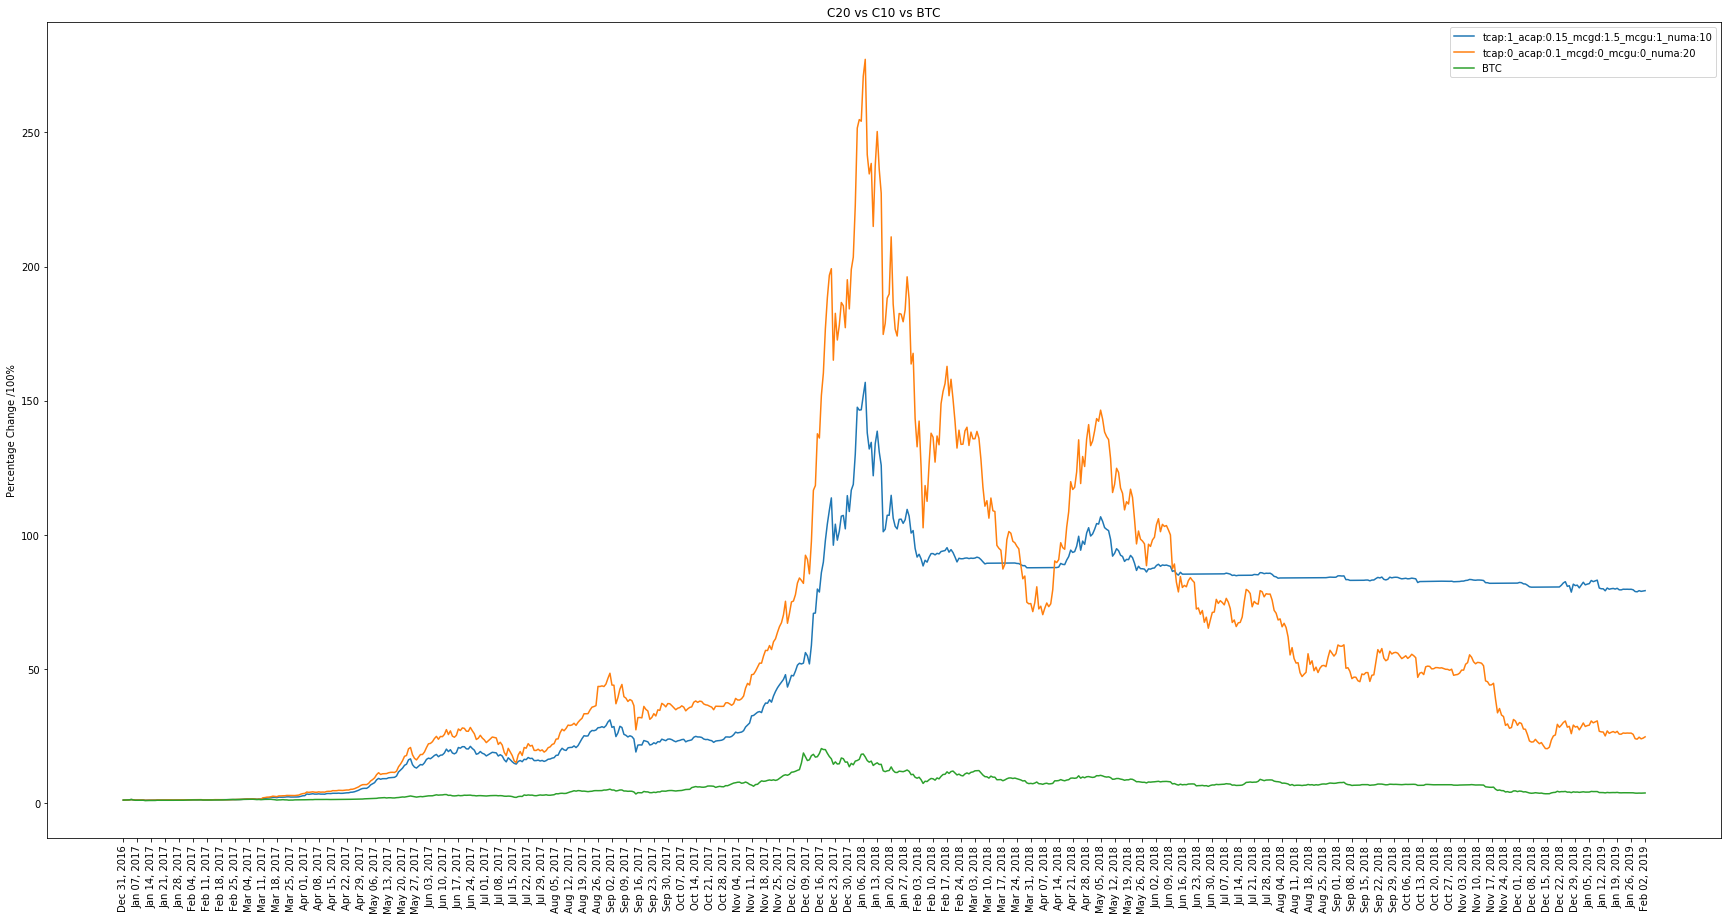

In [33]:
replace_titles = ["C10", "C20"]
final_comp_list = []
test_listy = []
test_listy_2 = []
graph_dict = {}
for count, graph in enumerate(final_dict_list):
    print(count)
    
    #     usdt_share = {}
    #     usdt_share[0] = 0.10      #USDT starts off with ___% for the date
    
    #reset defaults
    tether_multiplier = 0
    number_of_assets = 10
    single_asset_cap_ceiling = 0.15
    # expense_rate = 0.0004 #4 Basis Points
    max_tether_cap = 0.3
    usdt_share = {}
    usdt_share[0] = 0     #UDT starts off with ___% for the date
    
    #set specific params
    for param in graph:
        if param[0] == 'tcap':
            max_tether_cap = param[1]
        
        elif param[0] == 'acap':
            single_asset_cap_ceiling = param[1]
        
        elif param[0] == 'mcg':
            tether_multiplier_down = param[1]
            tether_multiplier_up = param[1]
            
        elif param[0] == 'mcgu':
            tether_multiplier_up = param[1]
         
        elif param[0] == 'mcgd':
            tether_multiplier_down = param[1]
            
        elif param[0] == 'numa':
            number_of_assets = param[1]
    

    print("Calculating: " + toTitle(graph))
    
    print("***************************************************************")
   

    for i in tmc_pct.index[1:]:
        #market down, crypto->tether
        if tmc_pct['total_mc'][i] < -0.01:
            usdt_share[i] = usdt_share[i-1] - tether_multiplier_down*(tmc_pct['total_mc'][i])
            if usdt_share[i] >= max_tether_cap:
                usdt_share[i] = max_tether_cap
                
        #market up, tether->crypto
        elif tmc_pct['total_mc'][i] > 0.01: 
            usdt_share[i] = usdt_share[i-1] - tether_multiplier_up*(tmc_pct['total_mc'][i])
            if usdt_share[i] <= 0:
                usdt_share[i] = 0
        else:
            usdt_share[i] = usdt_share[i-1]

    ilist = range(0, len(tmc_pct))

    tethershare = {}
 
    for (i, column) in zip(ilist, selectedmarket):
        tethershare[column] = usdt_share[i]

#     print('setting tethershare labels to match dates')

#     print('usdt_close prices and usdt_retruns (pct change)')
    usdt_close = pd.DataFrame(data = dailyclose.loc['bitcoin'])
    
    usdt_returns = usdt_close.pct_change(1) * 0 + daily_tether_interest_rate
    usdt_returns.columns = ["tether"]
    
#     usdt_returns.head(5)

#     print(usdt_returns.head(5))

    # single_asset_cap_ceiling = 0.15
#     print('loop for C10 with tether market cap function')
    #FOR LOOP FOR C10 with tether
    topmc10t = {}
    sc10t = {}
    tc10t = {}
    ps10t = {}
    invest10t = {}
    returns10t = {}
    lg_returns10t = {}
    selectedmc10t = {}
    topcoins10t = {}
    c10sharet = {}
    usdt_returnst = {}
    daily_usdt_returnst = {}

    daily_changet = {}
    weighted_daily_changet = {}
    daily_returnst = {}
    c10t_returns = list()
    tether_returns = list()


    #for every date
#     print(len(selectedmarket), "selectdmrkrk")
    prev_column = ""
    expense_multiplier = 1
    delta = 0
    for iter, column in enumerate(selectedmarket):
 
        #sort in descending order
        selectedmc10t[column] = selectedmarket[column].sort_values(ascending=False)
        
        #take the top coins
        topmc10t[column] = selectedmc10t[column].head(number_of_assets)

       
        #take the index of the top coins
        topcoins10t[column] = topmc10t[column].index
        
        
        #get the share cap of the top 10
        #column is a string formatted date

        sc10t[column] = share_cap(topmc10t[column], single_asset_cap_ceiling)      #CHOICE OF CAP CEILING  

        #total cap of top 10
        tc10t[column] = sum(sc10t[column])

        #percentage of total fund allocated to tether/C10- NEW CODE!!
        c10tfund = 1 - tethershare[column]

        #percentage share to be allocated for top 10 - NEW CODE!!!
        ps10t[column] = [x * c10tfund / tc10t[column] for x in sc10t[column] ]
        
#         print("teth, sumccol", tethershare[column], sum(ps10t[column]))
#         print(ps10t[column])

        #building dataframe of top20 coins by mc and %share to be invested
        invest10t[column] = pd.DataFrame()
        invest10t[column] = pd.DataFrame({'coin': topcoins10t[column], 'pct_share': ps10t[column]})
        invest10t[column] = invest10t[column].set_index('coin')
        
#         if iter > 0:
#             delta = calculate_expenses(invest10t[prev_column], invest10t[column])
#             print("delta", delta)
#             expense_multiplier = (1 - delta * expense_rate)
        
        prev_column = column
        

    print(len(tmc_pct)*7)
    jlist = list(range(0,len(tmc_pct)*7,7))

    for (j, column) in zip(jlist, selectedmarket):
        daily_changet[column] = pd.DataFrame()
        daily_changet[column] = pd.DataFrame(data = dailychanget.iloc[:,j:j+7])
        daily_changet[column] = daily_changet[column].loc[topcoins10t[column]]
        
        #Change in prices multiplied by the percentage of fund each coin holds
        weighted_daily_changet[column] = daily_changet[column].mul(ps10t[column], axis=0)

        daily_returnst[column] = weighted_daily_changet[column].sum()
        daily_returnst[column].columns = ['daily_returns']

        usdt_returnst[column] = pd.DataFrame()
        usdt_returnst[column] = pd.DataFrame(data = usdt_returns.iloc[j:j+7,:])
#         print(usdt_returnst[column])
        
#         print("usdt")
#         print(usdt_returnst[column])
#         print("share")
#         print(tethershare[column])
        
        daily_usdt_returnst[column] = usdt_returnst[column].mul(tethershare[column], axis = 0)

#         print(daily_usdt_returnst[column])
        c10t_returns.extend(daily_returnst[column])
        tether_returns.extend(daily_usdt_returnst[column]['tether'])
#         print(tether_returns)
        
#         print("kl")
#         print(daily_usdt_returnst[column]['tether'])

    #////////////////////////////////////////
#     print(c10t_returns)
#     print(len(c10t_returns))
    c10t_returns_df = pd.DataFrame(data = c10t_returns, index = dailychanget.columns, columns = ['c10t'])

    c10t_returns_df['tether'] = tether_returns
    c10t_returns_df['tether'][0] = 0
    
    #add returns from crypto-assets and returns earned from tether/cash holdings
    c10t_returns_df['c10t+tether'] = (c10t_returns_df['c10t'].add(c10t_returns_df['tether'])).copy()
    
    
    test_listy.append(c10t_returns_df['tether'].copy())
    test_listy_2.append(c10t_returns_df['c10t'].copy())
    
    
#     print(c10t_returns_df['tether'])

    c10t_returns_df.head(5)
    c10t_returns_df['c10t_cum'] = (1 + c10t_returns_df['c10t+tether']).cumprod()
    c10t_returns_df.head(5)
#     print(tmc_pct_full)
    c10t_returns_df.at[start_date,'c10+tether'] = 1
    c10t_returns_df.at[start_date,'c10t_cum'] = 1
    c10t_returns_df.head(10)
#     c10t_returns_df['c10t+tether'].std(axis = 0)

    tether_allocations = pd.DataFrame(data = tethershare, index = tethershare.keys())
    tether_allocations = tether_allocations.drop(tether_allocations.index[1:])
    tether_allocations = tether_allocations.T
    tether_allocations.columns = ['tether_share']
#     print(tether_allocations)        print("kl")
#     print(daily_usdt_returnst[column]['tether'])

    
    c10t_returns_df['tether_share'] = tether_allocations['tether_share']
#     tether_allocations.head(5)
#     print(tether_allocations)

    # print('Monthly returns growth')a = c10t_returns_df['c10t_cum'])
#     print("dfsfsfs", daily_returns)
    # Resampling the returns by month
    daily_returns = pd.DataFrame(data = c10t_returns_df['c10t_cum'])
#     print("dfsfsfs", daily_returns)
    daily_returns.index = pd.to_datetime(daily_returns.index)
    
    #cumulative performance by month
    monthly_df = daily_returns.resample('M').asfreq()
    
    #% performance relative to previous month
    monthly_df2 = (monthly_df - monthly_df.shift(1))/monthly_df.shift(1)
    monthly_df2 = monthly_df2.shift(-1)*100
    
    volatility = daily_returns.resample('Y').std()*math.sqrt(365)
    
    print("vol", volatility)
    print(monthly_df2)
    
    sharpe = monthly_df2.mean()/monthly_df2.std()
    print("monthly std", monthly_df2.std())
    print("sharpe", sharpe)
    print("sortino", sortino(monthly_df2, "c10t_cum"))
    
#     ax = daily_returns.plot.kde()
#     plt.show()
    
    graphmax = round(((c10t_returns_df[c10t_returns_df['c10t_cum']==c10t_returns_df['c10t_cum'].max()])["c10t_cum"]).iloc[0],4)
    graphfinal = round(c10t_returns_df["c10t_cum"].iloc[-1], 4)
    print("final", graphfinal, (graphfinal-1)*100)
    print("max", graphmax, (graphmax-1)*100)
    
    c10t_returns_df.drop("tether", 1, inplace=True)
    c10t_returns_df.drop("c10t", 1, inplace=True)
    c10t_returns_df.drop("c10t+tether", 1, inplace=True)
    c10t_returns_df.drop("c10+tether", 1, inplace=True)

    c10t_returns_df.to_excel(writer, toTitle(graph).replace(":","").replace("_",""))
    
    
#     monthly_df2.to_excel(writer, toTitle(graph).replace(":","").replace("_","") + "M")

    plt.ylabel('Percentage Change /100%')
    plt.rcParams['figure.figsize'] = (30,15)
    
    replace_title = replace_titles[count]
    
    plt.plot(c10t_returns_df['c10t_cum'], label=toTitle(graph))
    max_dd, start, end = max_drawdown(c10t_returns_df['c10t_cum'])
    print("Max drawdown", max_drawdown(c10t_returns_df['c10t_cum']))
    
    final_series_list.append(c10t_returns_df['c10t_cum'].copy())
    
    #Add dots indicating beginning and end of the maximum drawdown period
#     plt.plot([start, end], [c10t_returns_df['c10t_cum'][start], c10t_returns_df['c10t_cum'][end]], 'o', color='Red', markersize=10)
    
    plt.xticks(np.arange(0,len(c10t_returns_df),step=7), rotation=90)
#     plt.title(toTitle(graph).replace("_", " ") + " --" + " fin:" + str(graphfinal) + " max:" + str(graphmax))
    plt.title("C20 vs C10 vs BTC")
    final_comp_list.append((invest10t, toTitle(graph)))
    #     plt.ylim(0, 180)
    
    #/////////////////////////////////
#     plt.legend()
#     plt.savefig('tether_graphs_asymmetric/' + toTitle(graph) + ".png", dpi=100)
    
#     plt.clf()
#     plt.cla()
#     plt.close()


# plt.plot(tmc_pct_full['TMC'], label="TMC")
# plt.xticks(np.arange(0,len(tmc_pct_full),step=7), rotation=90)

pct_bitcoin.to_excel(writer, "Bitcoin")
plt.plot(pct_bitcoin['bitcoin'], label="BTC")
plt.xticks(np.arange(0,len(pct_bitcoin),step=7), rotation=90)

plt.legend()
plt.rcParams['figure.figsize'] = (30,15)
plt.savefig('tether_asymm_comb/' + "combined" + ".png", dpi=100)
plt.show()
writer.save()

In [ ]:
# test_listy_2[2] + test_listy[2] + 1).cumprod()

# (test_listy_2[2] + 1).cumprod()

test_listy_2[2]

In [ ]:
print(final_comp_list[2][0]["Feb 02, 2019"])
print(1-(final_comp_list[2][0]["Feb 02, 2019"]).sum())

In [ ]:
print(information_ratio(final_series_list[2],pct_bitcoin['bitcoin']))
print(information_ratio(final_series_list[2],final_series_list[3]))

print(information_ratio(pct_bitcoin['bitcoin'],final_series_list[3]))

In [ ]:
print("Max drawdown", max_drawdown(pct_bitcoin["bitcoin"]))
# print(pct_bitcoin["bitcoin"])
pct_bitcoin.index = pd.to_datetime(pct_bitcoin.index)
volatility = pct_bitcoin.resample('Y').std()*math.sqrt(365)
print(volatility)
monthly_btc = pct_bitcoin.resample('M').asfreq()
monthly_btc2 = (monthly_btc - monthly_btc.shift(1))/monthly_btc.shift(1)
monthly_btc2 = monthly_btc2.shift(-1)*100
print("Monthly BTC", monthly_btc2)
print("sharpe", monthly_btc2.mean()/monthly_btc2.std())
print("monthly standard deviation", monthly_btc2.std())
print("sortino", sortino(monthly_btc2, "bitcoin"))
graphmax = round(((pct_bitcoin[pct_bitcoin['bitcoin']==pct_bitcoin['bitcoin'].max()])["bitcoin"]).iloc[0],4)
graphfinal = round(pct_bitcoin["bitcoin"].iloc[-1], 4)
print(graphmax*100, graphfinal*100)

# Automatic PDF Generation

In [ ]:
from weasyprint import HTML, CSS
htmlC10A = HTML("C10A.HTML/Meridian-Aggressive-Factsheet-November-2.html")
cssC10A = CSS("C10A.HTML/Meridian-Aggressive-Factsheet-November-2-web-resources/css/idGeneratedStyles.css")




# Rolling Window Stuff Below Here

In [ ]:
plt.ylabel('Percentage Change /100%')
plt.rcParams['figure.figsize'] = (30,15)
plt.plot(c10t_returns_df['c10t_cum'], label="C10 w/Tether")
plt.xticks(np.arange(0,len(c10t_returns_df),step=7), rotation=90)
plt.title('C10 vs C10 w/Tether (market cap)')
plt.legend()
fig.savefig('', dpi=100)


In [ ]:
wins_dict = {"c10_cum": [], "c10t_cum": []}
summary_dict = {"c10_cum": 0, "c10t_cum": 0}
#dtest.strftime("%b %d, %Y")

#iterates through periods
for count, pair in enumerate(str_windows):
    start_date = pair[0]
    end_date = pair[1]
    
    print(start_date, end_date)
    
#     start_date_dt = datetime.strptime(start_date, "%b %d, %Y").date()
#     end_date_dt = datetime.strptime(end_date, "%b %d, %Y").date()
    
#     print(start_date, end_date, start_date_dt, end_date_dt)
    
    #////////////////////////////////////////////////////////////////////////////////////////////
    # Selecting dates and median market caps
    selectedmarket = mc_data.copy()
    selectedmarket = selectedmarket.loc[:, start_date:end_date:7]
    # selectedmarket = selectedmarket.resample('W',axis=1).median()

    # Selecting dates and median close price
    selectedclose = close_data.copy()
    selectedclose = selectedclose.loc[:, start_date:end_date:7]
    # selectedclose = selectedclose.resample('W',axis=1).median()

    # Daily close prices
    dailyclose = close_data.loc[:,start_date:end_date]
    dailyclose1 = dailyclose.copy().T
    dailychanget = dailyclose1.pct_change(1).T
    dailychange = dailyclose1.pct_change(1).T

    # Calculating percent change for returns
    selectedclose1 = selectedclose.copy().T
    selectedreturns = selectedclose1.pct_change(1).T
    selectedreturns.head()
    print('selected market, selectedclose, dailychange and selectedreturns')

    print('Total market cap movement for tethershare')
    tmc_list = list()

    for column in selectedmarket.columns:
        tmc_list.append(selectedmarket[column].sum())

    tmc_data = pd.DataFrame(data = tmc_list, columns = ['total_mc'])
#     print(tmc_data)
    tmc_data.index = selectedmarket.columns
    tmc_pct = tmc_data.pct_change(1)
#     print(tmc_pct)

    # Resampling the tmc data to get weekly
    tmc_pct = tmc_pct.loc[start_date:end_date,:]
    # tmc_pct = tmc_pct.resample('W').median()
    tmc_pct_index = tmc_pct.index

    tmc_pct.head(5)

    print('tether share allocations per week')
    tether_multiplier = 0
    max_tether_cap = 0.3
    
    print(len(tmc_pct_index), "full weeks in period")

    num_index = np.arange(len(tmc_pct_index))
    tmc_pct.index = num_index

#     usdt_share = {}
#     usdt_share[0] = 0.10      #USDT starts off with ___% for the date


    for i in tmc_pct.index[1:]:
        if tmc_pct['total_mc'][i] < -0.01:
            usdt_share[i] = usdt_share[i -1] - tether_multiplier*(tmc_pct['total_mc'][i])
            if usdt_share[i] >= max_tether_cap:
                usdt_share[i] = max_tether_cap
        elif tmc_pct['total_mc'][i] > 0.01: 
            usdt_share[i] = usdt_share[i -1] - tether_multiplier*(tmc_pct['total_mc'][i])
            if usdt_share[i] <= 0:
                usdt_share[i] = 0
        else:
            usdt_share[i] = usdt_share[i -1]

    ilist = range(0, len(tmc_pct))

    tethershare = {}

    for (i, column) in zip(ilist, selectedmarket):
        tethershare[column] = usdt_share[i]

    print('setting tethershare labels to match dates')


    print('usdt_close prices and usdt_returns (pct change)')
    usdt_close = pd.DataFrame(data = dailyclose.loc['tether'])
    usdt_returns = usdt_close.pct_change(1)
    usdt_returns.head(5)


    single_asset_cap_ceiling = 0.15
    print('loop for C10 with tether market cap function')
    #FOR LOOP FOR C10 with tether
    topmc10t = {}
    sc10t = {}
    tc10t = {}
    ps10t = {}
    invest10t = {}
    returns10t = {}
    lg_returns10t = {}
    selectedmc10t = {}
    topcoins10t = {}
    c10sharet = {}
    usdt_returnst = {}
    daily_usdt_returnst = {}

    daily_changet = {}
    weighted_daily_changet = {}
    daily_returnst = {}
    c10t_returns = list()
    tether_returns = list()


    #for every date
    for column in selectedmarket:
        #sort in descending order
        selectedmc10t[column] = selectedmarket[column].sort_values(ascending=False)

        #take the top coins
        topmc10t[column] = selectedmc10t[column].head(10)
        #take the index of the top coins
        topcoins10t[column] = topmc10t[column].index

        #get the share cap of the top 10
        sc10t[column] = share_cap(topmc10t[column], single_asset_cap_ceiling)      #CHOICE OF CAP CEILING

        #total cap of top 10
        tc10t[column] = sum(sc10t[column])

        #percentage of total fund allocated to tether/C10- NEW CODE!!
        c10tfund = 1 - tethershare[column]

        #percentage share to be allocated for top 10 - NEW CODE!!!
        ps10t[column] = [x * c10tfund / tc10t[column] for x in sc10t[column] ]

        #building dataframe of top20 coins by mc and %share to be invested
        invest10t[column] = pd.DataFrame()
        invest10t[column] = pd.DataFrame({'coin': topcoins10t[column], 'pct_share': ps10t[column]})
        invest10t[column] = invest10t[column].set_index('coin')
        
    jlist = list(range(0,365,7))

    for (j, column) in zip(jlist, selectedmarket):
        daily_changet[column] = pd.DataFrame()
        daily_changet[column] = pd.DataFrame(data = dailychanget.iloc[:,j:j+7])
        daily_changet[column] = daily_changet[column].loc[topcoins10t[column]]
        weighted_daily_changet[column] = daily_changet[column].mul(ps10t[column], axis=0)

        daily_returnst[column] = weighted_daily_changet[column].sum()
        daily_returnst[column].columns = ['daily_returns']


        usdt_returnst[column] = pd.DataFrame()
        usdt_returnst[column] = pd.DataFrame(data = usdt_returns.iloc[j:j+7,:])
        daily_usdt_returnst[column] = usdt_returnst[column].mul(tethershare[column], axis = 0)

        c10t_returns.extend(daily_returnst[column])
        tether_returns.extend(daily_usdt_returnst[column]['tether'])

    #/////////////////////////////////////////////////////////////////
    print('loop for C10 without tether market cap function')
    #FOR LOOP FOR C10 with tether
    topmc10 = {}
    sc10 = {}
    tc10 = {}
    ps10 = {}
    invest10 = {}
    returns10 = {}
    lg_returns10 = {}
    selectedmc10 = {}
    topcoins10 = {}
    c10share = {}
    usdt_returns = {}
    daily_usdt_returns = {}

    daily_change = {}
    weighted_daily_change = {}
    daily_returns = {}
    c10_returns = list()


    #for every date
    for column in selectedmarket:
        #sort in descending order
        selectedmc10[column] = selectedmarket[column].sort_values(ascending=False)

        #take the top coins
        topmc10[column] = selectedmc10[column].head(10)
        #take the index of the top coins
        topcoins10[column] = topmc10[column].index

        #get the share cap of the top 10
        sc10[column] = share_cap(topmc10[column], single_asset_cap_ceiling)      #CHOICE OF CAP CEILING

        #total cap of top 10
        tc10[column] = sum(sc10[column])

        #percentage share to be allocated for top 10 - NEW CODE!!!
        ps10[column] = [x / tc10[column] for x in sc10[column] ]

        #building dataframe of top20 coins by mc and %share to be invested
        invest10[column] = pd.DataFrame()
        invest10[column] = pd.DataFrame({'coin': topcoins10[column], 'pct_share': ps10[column]})
        invest10[column] = invest10[column].set_index('coin')

    jlist = list(range(0,365,7))

    for (j, column) in zip(jlist, selectedmarket):
        daily_change[column] = pd.DataFrame()
        daily_change[column] = pd.DataFrame(data = dailychange.iloc[:,j:j+7])
        daily_change[column] = daily_change[column].loc[topcoins10[column]]
        weighted_daily_change[column] = daily_change[column].mul(ps10[column], axis=0)

        daily_returns[column] = weighted_daily_change[column].sum()
        daily_returns[column].columns = ['daily_returns']

        c10_returns.extend(daily_returns[column])

    #////////////////////////////////////////////////////////////////////////////////////////////
        
    c10t_returns_df = pd.DataFrame(data = c10t_returns, index = dailychange.columns, 
                                   columns = ['c10t'])
    c10t_returns_df['tether'] = tether_returns
    c10t_returns_df['c10t+tether'] = c10t_returns_df['tether'] + c10t_returns_df['c10t']

    c10t_returns_df['c10'] = c10_returns

    c10t_returns_df.head(5)

    c10t_returns_df['c10t_cum'] = (1 + c10t_returns_df['c10t+tether']).cumprod()
    c10t_returns_df['c10_cum'] = (1 + c10t_returns_df['c10']).cumprod()
    c10t_returns_df.head(5)

    c10t_returns_df.at[start_date,'c10+tether'] = 1
    c10t_returns_df.at[start_date,'c10_cum'] = 1
    c10t_returns_df.at[start_date,'c10t_cum'] = 1
    c10t_returns_df.at[start_date,'c10'] = 1
    c10t_returns_df.head(10)
    c10t_returns_df['c10t+tether'].std(axis = 0)

    tether_allocations = pd.DataFrame(data = tethershare, index = tethershare.keys())
    tether_allocations = tether_allocations.drop(tether_allocations.index[1:])
    tether_allocations = tether_allocations.T
    tether_allocations.columns = ['tether_share']
    tether_allocations.head(5)
    
    print('Monthly returns growth')
    # Resampling the two returns by month
    daily_returns = pd.DataFrame(data = [c10t_returns_df['c10_cum'], 
                                           c10t_returns_df['c10t_cum']],)
    daily_returns.columns = pd.to_datetime(daily_returns.columns)
    daily_returns = daily_returns.T
    monthly_df = daily_returns.resample('MS').asfreq()[0:13]


    monthly_df.head(13)
    print(daily_returns)

    for key in wins_dict.keys():
        wins_dict[key].append(0)

    #iterates over all timesteps for one period
    for index, row in daily_returns.iterrows():
        largest = -10000
        win_key = ""
        
        #This loop compares values of all strats per single timestep
        for key in wins_dict.keys():
            if float(row[key]) > largest:
                largest = float(row[key])
                win_key = key

        wins_dict[win_key][count] += 1 

#     print(wins_dict)
#     print(daily_returns_nt)

In [ ]:
# print('tether share allocations per week')

# num_index = np.arange(53)
# tmc_pct.index = num_index

# usdt_share = {}
# usdt_share[0] = 0.10      #USDT starts off with ___% for the date


# for i in tmc_pct.index[1:]:
#     if tmc_pct['total_mc'][i] < -0.01:
#         usdt_share[i] = usdt_share[i -1] + 0.02
#         if usdt_share[i] >= 1.00:
#             usdt_share[i] = 1.00
#     elif tmc_pct['total_mc'][i] > 0.01: 
#         usdt_share[i] = usdt_share[i -1] - 0.02
#         if usdt_share[i] <= 0:
#             usdt_share[i] = 0
#     else:
#         usdt_share[i] = usdt_share[i -1]

In [ ]:
for i in range(num_windows):
    currmax=-1000
    currkey=""
    for key in wins_dict.keys():

        value = wins_dict[key][i]
        if value>currmax:
            currmax=value
            currkey=key
    
    summary_dict[currkey] += 1
    print(summary_dict, i)

In [ ]:
print(wins_dict)
print(summary_dict)

In [ ]:
plt.ylabel('Percentage Change /100%')
plt.rcParams['figure.figsize'] = (30,15)
plt.plot(c10t_returns_df['c10_cum'], label="C10")
plt.plot(c10t_returns_df['c10t_cum'], label="C10 w/Tether")
plt.xticks(np.arange(0,365,step=7), rotation=90)
plt.title('C10 vs C10 w/Tether (market cap)')
plt.legend()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))
ax1.plot(tether_allocations.index, tether_allocations, label = "Tether allocation mc*2")
ax1.set_ylabel('% share allocated to tether')

ax2.plot(c10t_returns_df.index, c10t_returns_df['c10t_cum'], label = "Tether 2x (100% cap)")
ax2.plot(c10t_returns_df.index, c10t_returns_df['c10_cum'], label = "C10")
ax2.set_ylabel('Portfolio cumulative simple returns (%)')


ax2.set_xticks(np.arange(0,365,step=7))

ax1.set_xticklabels(tether_allocations.index ,rotation=90, fontsize = 7)
ax2.set_xticklabels(tether_allocations.index ,rotation=90, fontsize = 7)

labels = [item.get_text() for item in mpl.axes.Axes.get_xticklabels(ax2)]

ax1.legend()
ax2.legend()

plt.show()

In [ ]:
print(freqvals_list)
LABELS_freq =  ["Daily", "Weekly", "Monthly", "No Rebalancing"]
LABELS_cap = ["10", "20", "30", "40","No Cap"]
LABELS_coins = ["10", "20", "30", "40"]
plt.xlabel('Number of Coins')
plt.ylabel('Number of Wins')
plt.title("Wins Per Number of Coins Over 105 175-Day Rolling Windows", fontsize = 10)
#colors_list = ['#7FFFD4','#76EEC6','#66CDAA','#458B74'] #aquamarines
colors_list = ['blue','orange','yellow','green', 'gray']

barlist = plt.bar(range(len(freqvals_list)), freqvals_list, align='center',alpha = 0.8)
plt.xticks(range(len(freqvals_list)), LABELS_coins)
for bar,color in zip(barlist,colors_list):
    bar.set_color(color)

In [ ]:
print('Monthly Returns 2*MC, 100% cap')
monthly_df2 = (monthly_df - monthly_df.shift(1))/monthly_df.shift(1)
monthly_df2.shift(-1)

In [ ]:
monthly_df2.to_csv('2%100.csv')

In [ ]:
import sys
for key in sys.modules.keys():
    print(key)